# Titanic Disaster

In this reboot, we will explore the famous [Titanic](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv) dataset listing all passengers with various properties.

##### ❓ Start loading `matplotlib`, `numpy` and `pandas` the usual way

In [573]:
import numpy as np
import pandas as pd
import matplotlib

##### ❓ Run `!ls -lh` to list files in the current folder. You should see a `.csv` file.

In [574]:
file = 'data/ML_Titanic_dataset.csv'
titanic_df = pd.read_csv(file, decimal=',')

##### ❓ Load the CSV data as a into a `titanic_df` variable.

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [575]:
titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


##### ❓ Explore the dataset with the usual methods (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

Do not hesitate to add cells by pressing `B`.

In [576]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          714 non-null    object
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Cabin        204 non-null    object
 11  Embarked     889 non-null    object
dtypes: int64(5), object(7)
memory usage: 83.7+ KB


##### It seems that the `Cabin` information is missing in 687 rows. Pretty normal considering people in 3rd class (`Pclass`) did not have one!

❓ Use the [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function to get rid of the `Cabin` in `titanic_df`

In [577]:
titanic_df.drop(columns='Cabin', inplace=True)

## Classes Analysis

Let's have a look at the ticket divide.

❓ Using a `groupby()`, create a `pclass_df` dataframe counting the number of tickets sold per class (1, 2 or 3)

In [578]:
titanic_df_1 =  titanic_df[['Survived','Ticket','Pclass','Sex']]

In [579]:
titanic_pclass = titanic_df_1.groupby(by=['Pclass'])
pclass_df = titanic_pclass[['Ticket']].count()
pclass_df

,Ticket
Pclass,
1,216
2,184
3,491


##### Looking at the number is not very visual, let's try to make sense of the data with a plot.

❓ Plot the `pclass_df` dataframe built in the previous question as a barchart

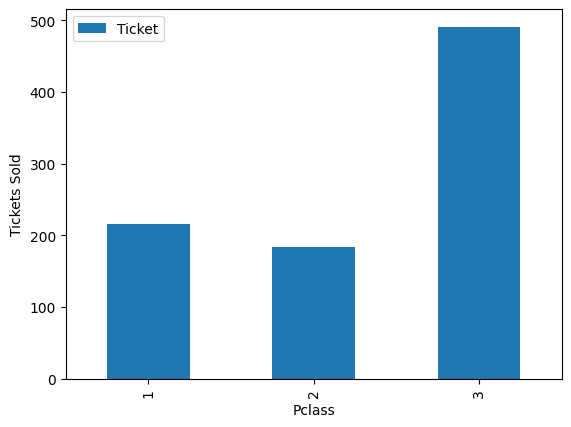

In [580]:
pclass_df.plot(kind='bar').set_ylabel("Tickets Sold");

##### Let's now have a look at **survivors**.

❓ Plot a barchart of *frequency of survivals* per class. `0` means no one survived in the class, `1` means everyone survived.

In [581]:
titanic_df_1.rename(columns={'Pclass':'Class'}, inplace=True)
titanic_df_1['Survived'] = titanic_df_1['Survived'].replace({0:'No',1:'Yes'}).astype('str')

/tmp/ipykernel_21694/2156902530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_1.rename(columns={'Pclass':'Class'}, inplace=True)
/tmp/ipykernel_21694/2156902530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_1['Survived'] = titanic_df_1['Survived'].replace({0:'No',1:'Yes'}).astype('str')


In [582]:
titanic_df_1.replace({1:'1sr',2:'2nd',3:'3rd'}, inplace=True)

/tmp/ipykernel_21694/3363566897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_1.replace({1:'1sr',2:'2nd',3:'3rd'}, inplace=True)


In [583]:
titanic_df_1

,Survived,Ticket,Class,Sex
0,No,A/5 21171,3rd,male
1,Yes,PC 17599,1sr,female
2,Yes,STON/O2. 3101282,3rd,female
3,Yes,113803,1sr,female
4,No,373450,3rd,male
...,...,...,...,...
886,No,211536,2nd,male
887,Yes,112053,1sr,female
888,No,W./C. 6607,3rd,female
889,Yes,111369,1sr,male


In [584]:
titanic_survived_class_group = titanic_df_1.groupby(by=['Class','Survived'])

In [585]:
survived_group_by_class = titanic_survived_class_group[['Ticket']].count()
survived_group_by_class

Ticket
Class Survived        
1sr   No            80
      Yes          136
2nd   No            97
      Yes           87
3rd   No           372
      Yes          119

In [586]:
survived_by_class_df = survived_group_by_class.unstack(level=-1)
survived_by_class_df.columns = survived_by_class_df.columns.droplevel()

In [587]:
survived_by_class_df

Survived,No,Yes
Class,,
1sr,80,136
2nd,97,87
3rd,372,119


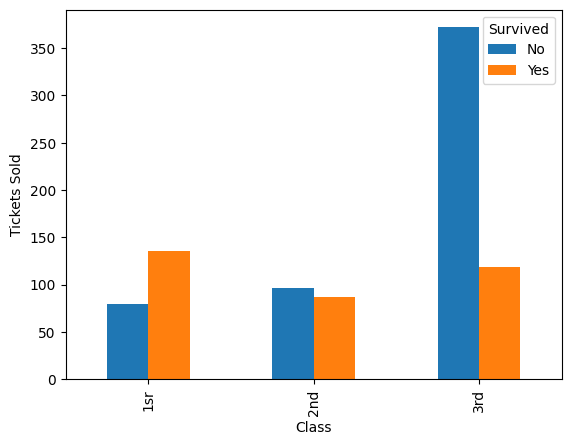

In [588]:
survived_by_class_df.plot(kind='bar').set_ylabel("Tickets Sold");

### Gender Analysis

Let's have a look at the `Sex` column.

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check the different values used in that column

In [589]:
titanic_df_1['Sex'].unique()

array(['male', 'female'], dtype=object)

##### ❓ Plot a barchart of survival frequency of each gender. Who survived the most?

In [590]:
titanic_survived_sex_group = titanic_df_1.groupby(by=['Sex','Survived'])

In [591]:
survived_group_by_sex = titanic_survived_sex_group[['Ticket']].count()
survived_group_by_sex

Ticket
Sex    Survived        
female No            81
       Yes          233
male   No           468
       Yes          109

In [592]:
survived_by_sex_df = survived_group_by_sex.unstack(level=-1)
survived_by_sex_df.columns = survived_by_sex_df.columns.droplevel()

In [593]:
survived_by_sex_df

Survived,No,Yes
Sex,,
female,81,233
male,468,109


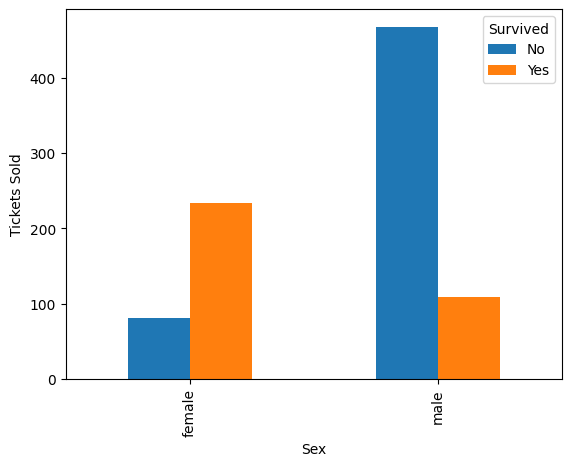

In [594]:
survived_by_sex_df.plot(kind='bar').set_ylabel("Tickets Sold");

##### Let's build a fancier histogram where we show the total number of passengers + the total number of survivors (for each gender).

❓ Build a `survivors_df` DataFrame with two columns: `Total` and `Survived`, and two rows (`male` and `female`). Plot it.

In [595]:
titanic_df_2 = titanic_df[['Survived','Pclass','Sex','Age','Name']]

In [596]:
survived_group_by_sex2 = titanic_df_2.groupby(by=['Sex','Survived'])

In [597]:
survived_by_sex_df['Total'] = survived_by_sex_df[['Yes','No']].sum(axis=1)

In [598]:
survived_by_sex_df

Survived,No,Yes,Total
Sex,,,
female,81,233,314
male,468,109,577


In [599]:
survivors_df = survived_by_sex_df.drop(columns={'No'})

In [600]:
survivors_df

Survived,Yes,Total
Sex,,
female,233,314
male,109,577


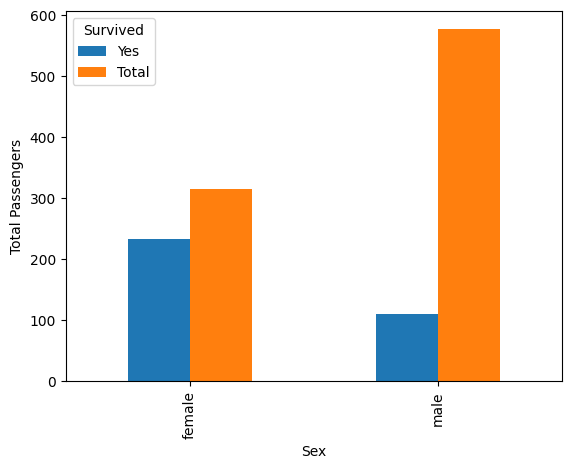

In [601]:
survivors_df.plot(kind='bar').set_ylabel("Total Passengers");

## Children

The former analysis did not take into account ages. We want to differentiate between a child and an adult and see how survival rates are affected.

❓ Use boolean indexing to create a `children_df` containing only rows of child passengers

In [602]:
titanic_df_2[['Age']] = titanic_df_2[['Age']].astype('float')

/tmp/ipykernel_21694/37481804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_2[['Age']] = titanic_df_2[['Age']].astype('float')


In [603]:
children_df = titanic_df_2[titanic_df_2['Age'] < 18]

❓ How many children were there in the Titanic?

In [604]:
total_childrens = int(children_df['Age'].sum())
total_childrens

1021

❓ How many children survived?

In [605]:
children_group = children_df.groupby(by=['Sex','Survived'])

In [606]:
children_group_df = children_group[['Name']].count()

In [607]:
childrens_survived = children_group_df.sum()
childrens_survived

Name    113
dtype: int64

❓ Plot a barchart of survivors / total for each category: `male`, `female`, `children`. Bear in mind that you need to **substract** the boys from the `male` statistics, and the girls from the `female` statistics.

In [608]:
childrens_survived_df = children_group_df.unstack(level=-1)
childrens_survived_df.columns = childrens_survived_df.columns.droplevel()

In [609]:
childre_sum_df = childrens_survived_df
sum_child = childre_sum_df.sum(axis=0) # Para sumarlos valores de las filas seleccionadas

In [610]:
childre_sum_df.loc['children'] = sum_child # Para agregar una nueva fila al df

In [625]:
children_survived = childre_sum_df.drop(childre_sum_df.index[[0, 1]])
# Eliminar las dos primeras filas

In [623]:
children_survived.reset_index(level='Sex', inplace=True)


In [645]:
children_survived

Survived,0,1
Sex,,
children,52,61


In [629]:
adult_df = titanic_df_2[titanic_df_2['Age'] > 18]

In [630]:
adult_group = adult_df.groupby(by=['Sex','Survived'])
adult_group_df = adult_group[['Name']].count()

In [631]:
sex_survived = adult_group_df.unstack(level=-1)
sex_survived.columns = sex_survived.columns.droplevel()

In [654]:
sex_survived

Survived,0,1
Sex,,
female,42,151
male,313,69


In [655]:
adult_children = pd.concat([sex_survived,children_survived])

In [657]:
adult_children_df =adult_children.rename(columns={0:'No',1:'Yes'})

In [659]:
adult_children_df['Total'] = adult_children_df[['Yes','No']].sum(axis=1)

In [660]:
adult_children_df

Survived,No,Yes,Total
Sex,,,
female,42,151,193
male,313,69,382
children,52,61,113


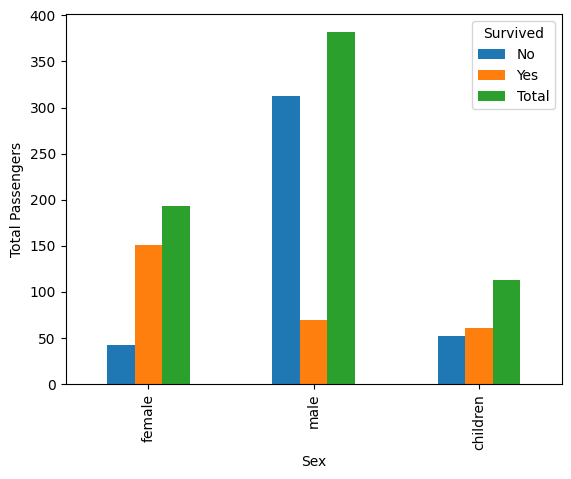

In [662]:
adult_children_df.plot(kind='bar').set_ylabel("Total Passengers");

## Big families

❓ Find out if it was harder for bigger families to survive?
  
Here you create a new column in your `DataFrame` for the family size of the passenger.

In [ ]:
# YOUR CODE HERE

## Distinguished titles

❓ Were passengers with distinguished titles preferred during the evacuation?
   
With some string manipulation, create a new column for each user with their title

In [ ]:
# YOUR CODE HERE